# Plot CFHT2HST Images

## Imoprt Libraries

In [1]:
%matplotlib inline

# Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle

#remove grid from images
sns.set_style("whitegrid", {'axes.grid' : False})

## Load batch

In [2]:
with open('cfht2hst_batch32.p', 'rb') as fp:
    batch = pickle.load(fp)

In [3]:
n_batch = batch['inputs'].shape[0]
batch.keys()

dict_keys(['flux_radius', 'inputs', 'mag_auto', 'ps_cfht', 'ps_hst', 'psf_cfht', 'psf_hst', 'targets', 'attributes'])

## Plot Galaxy Images

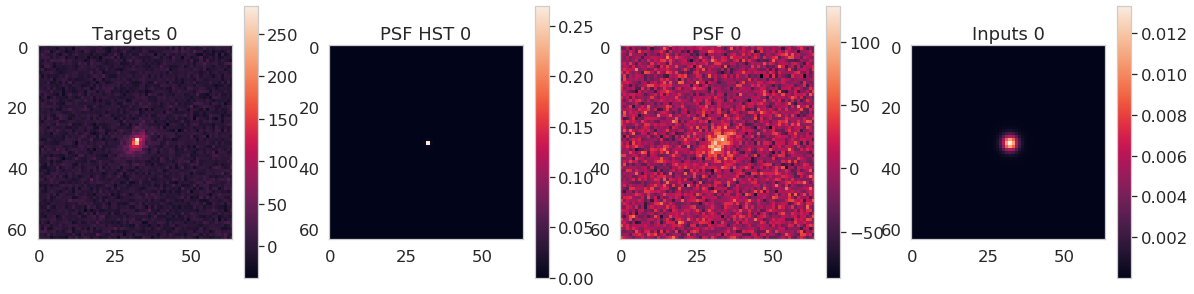

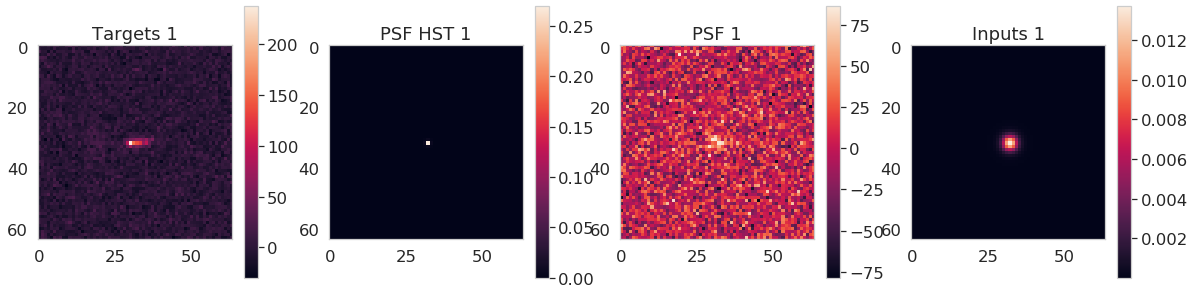

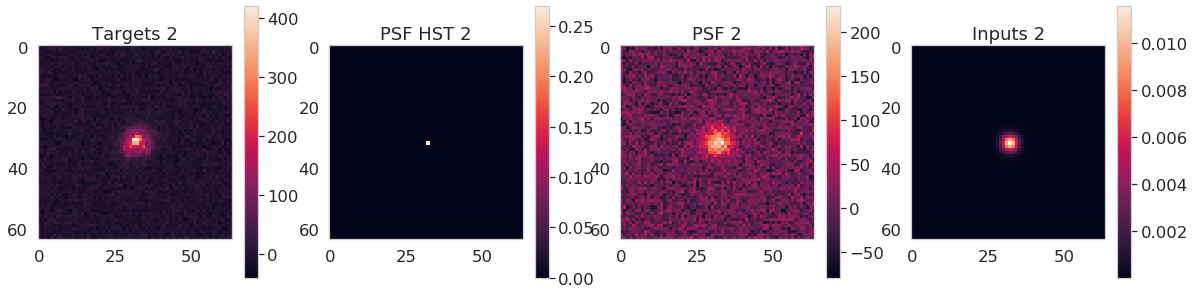

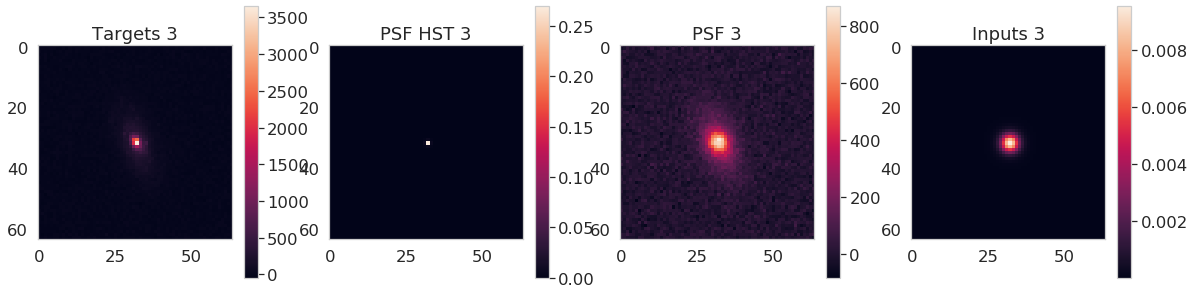

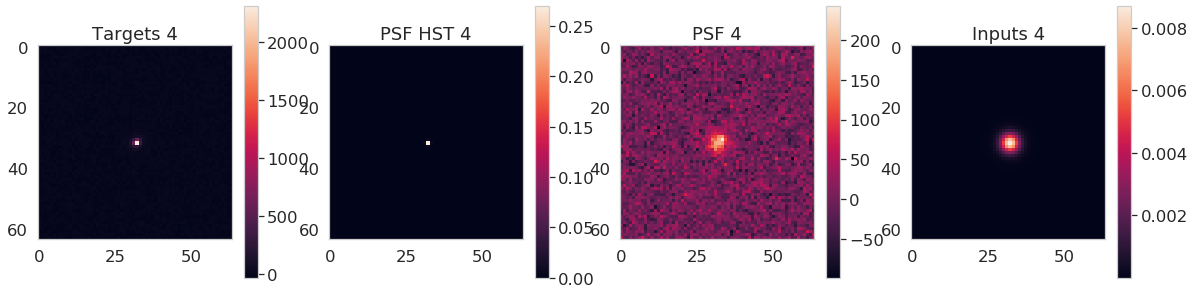

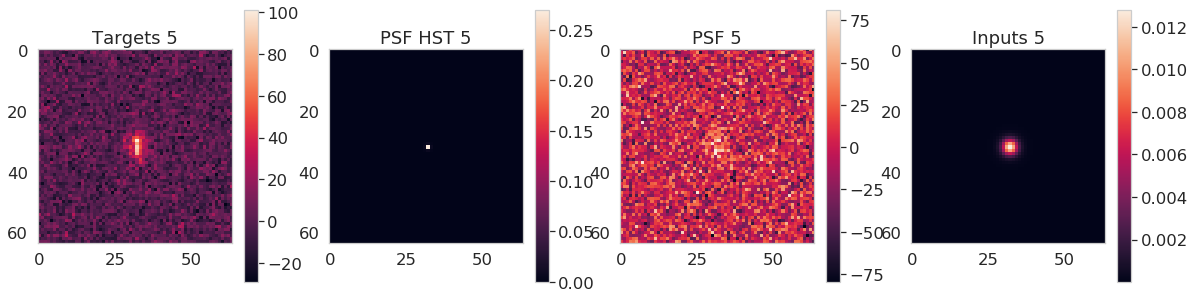

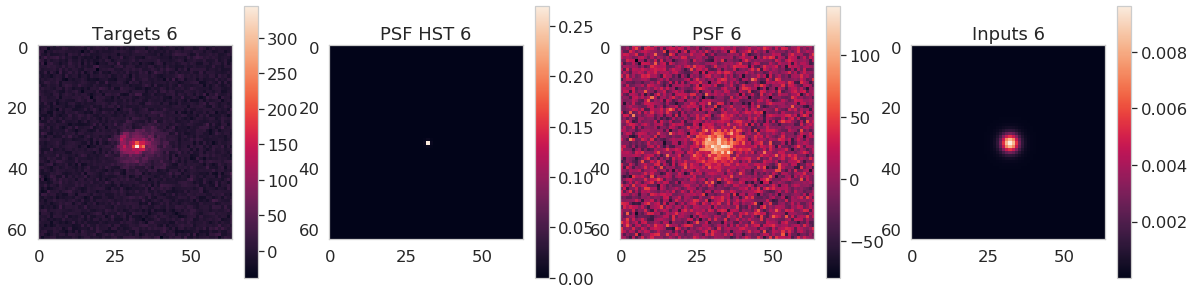

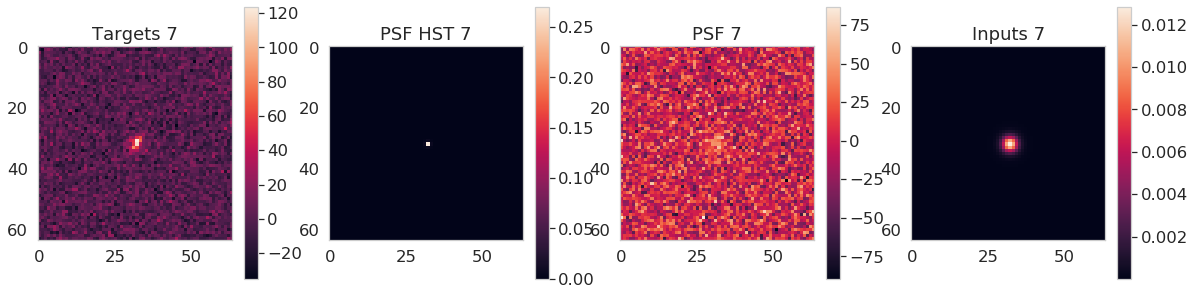

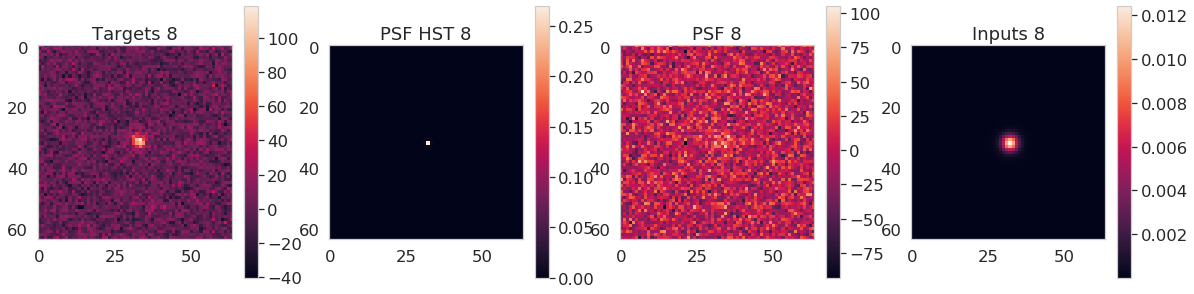

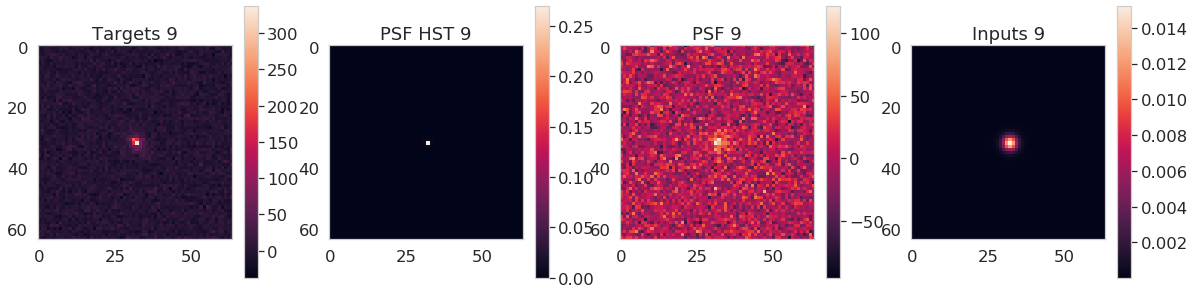

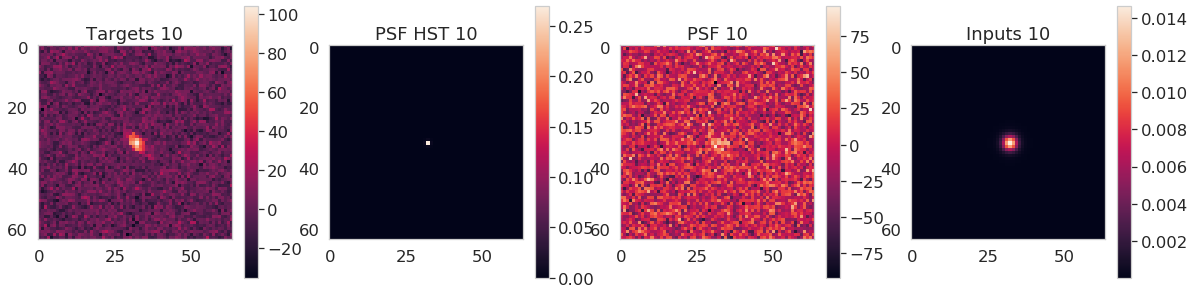

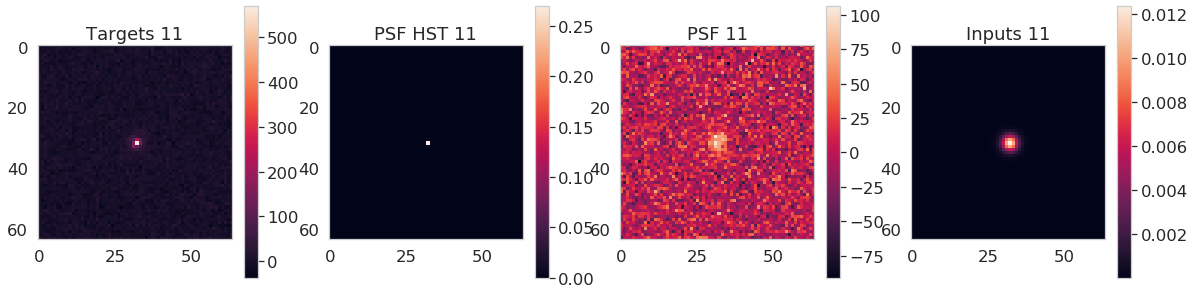

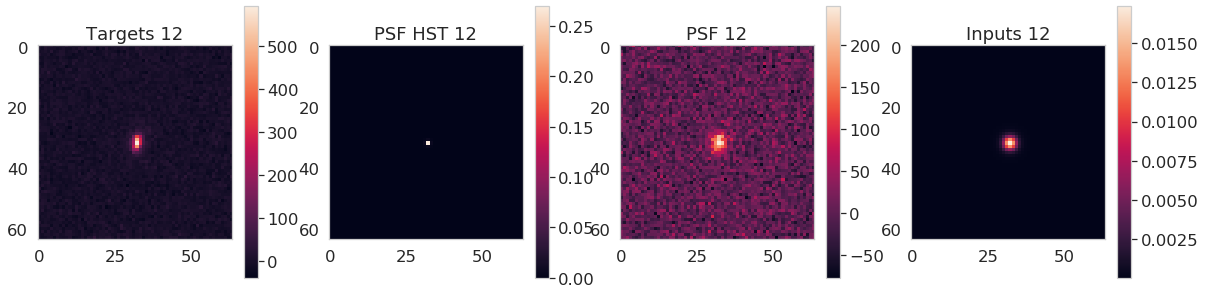

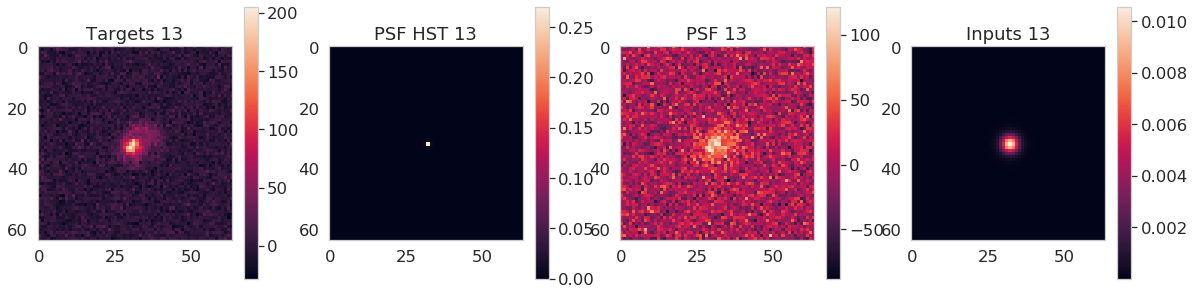

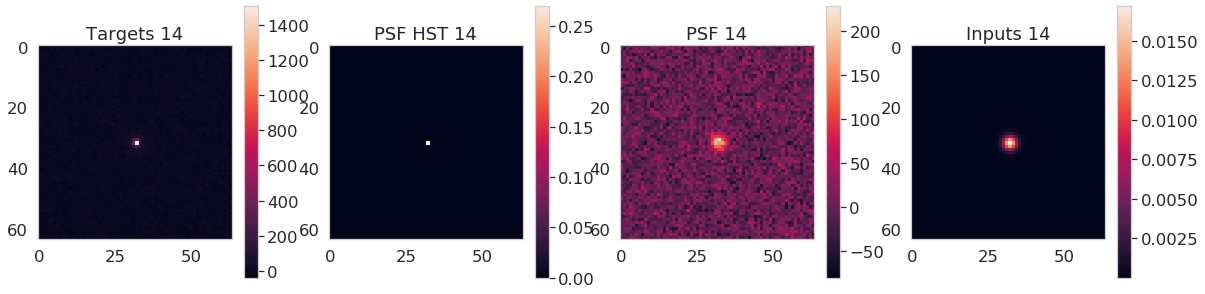

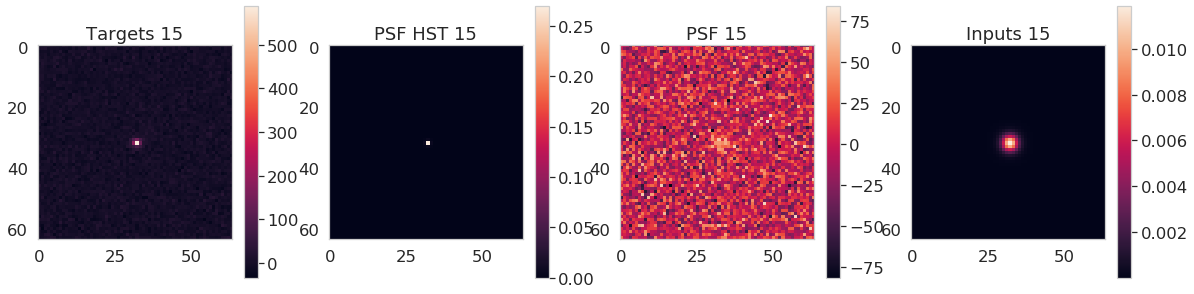

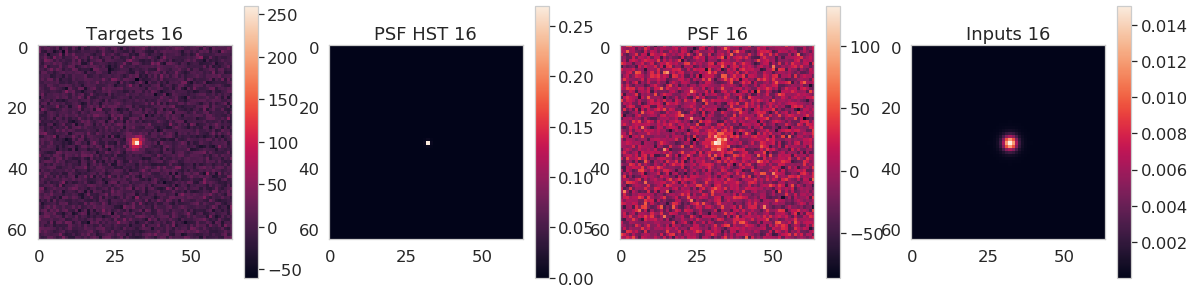

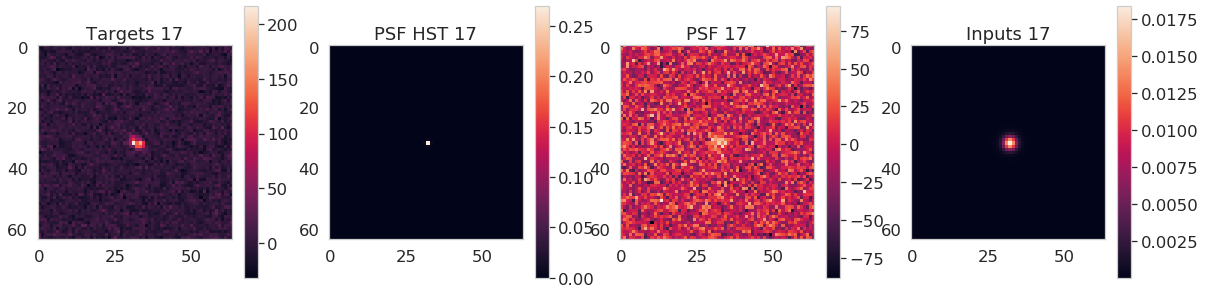

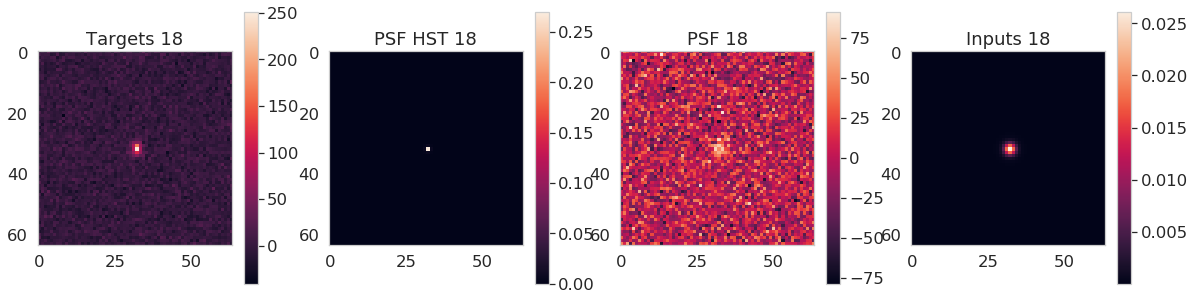

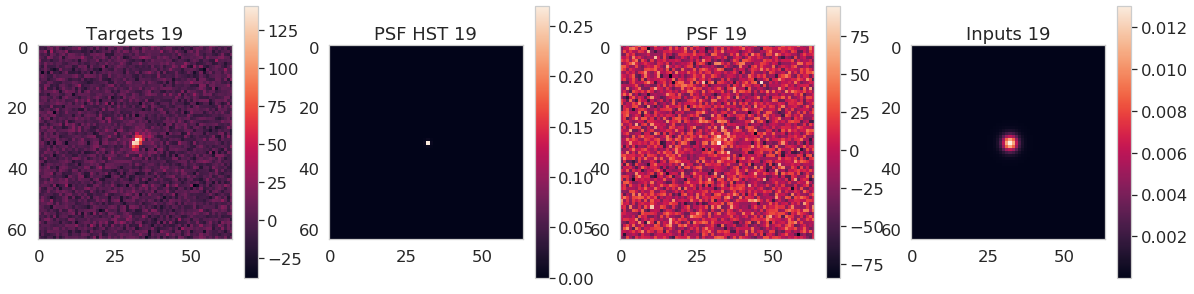

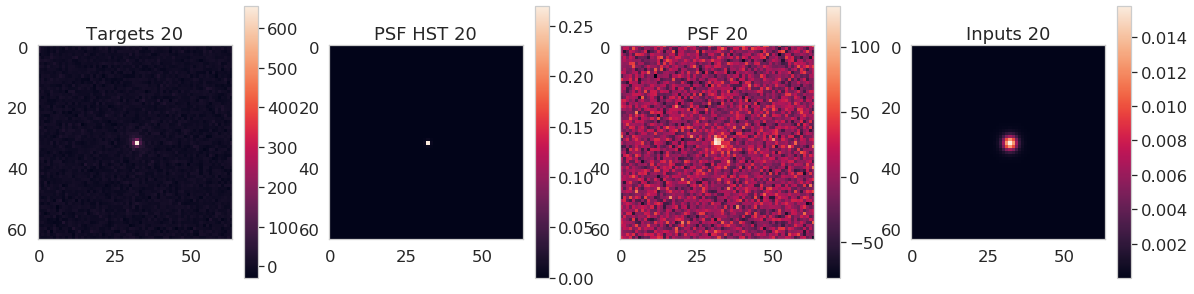

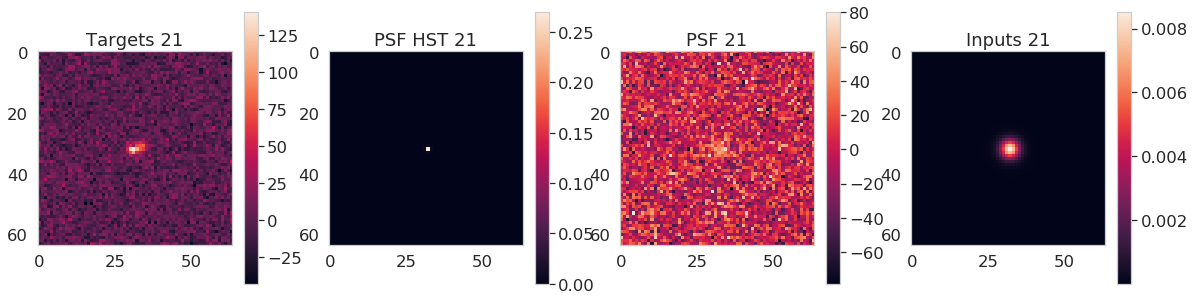

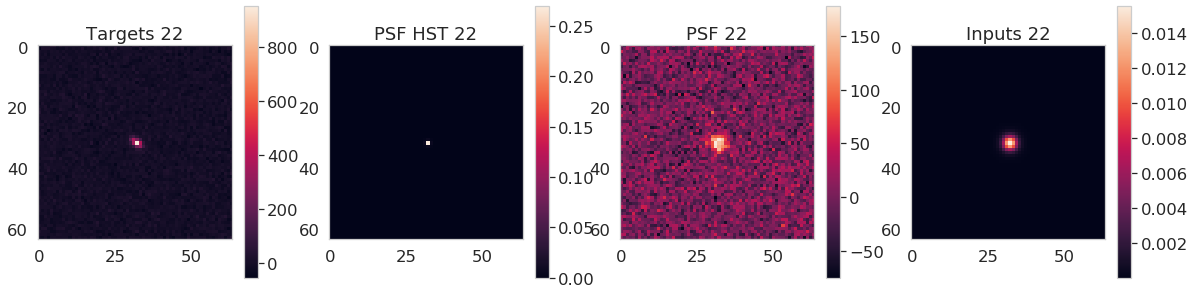

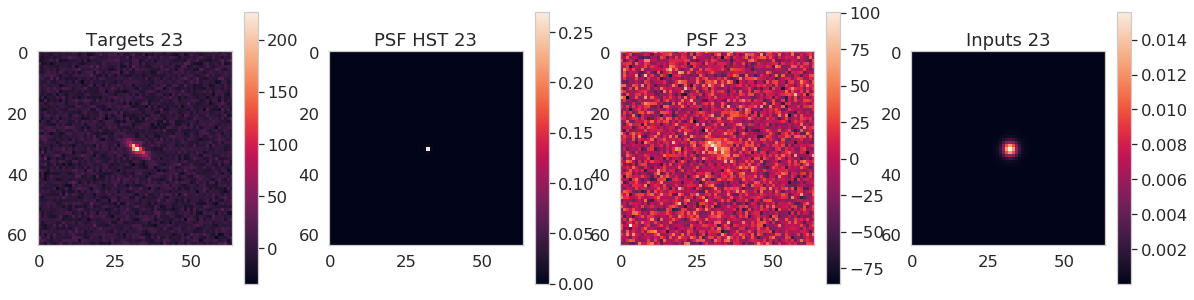

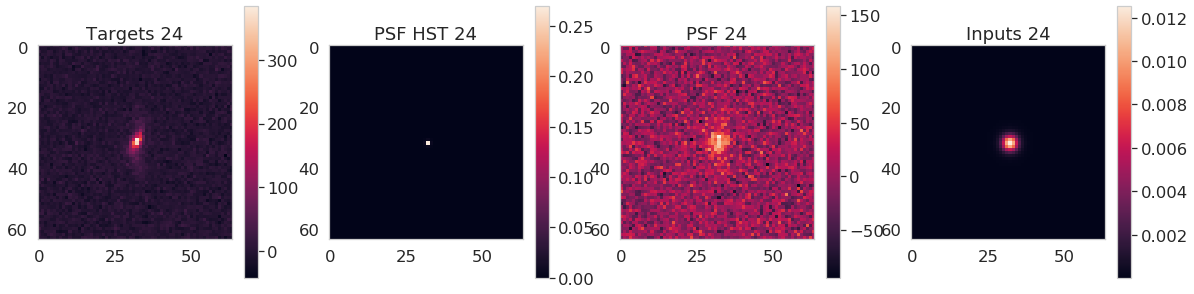

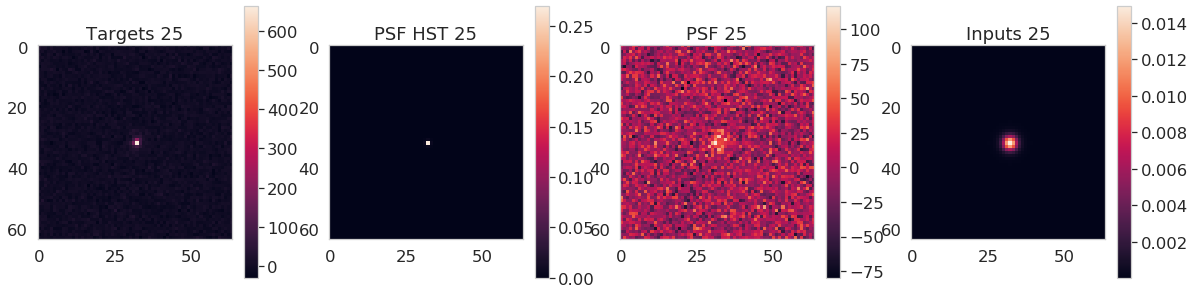

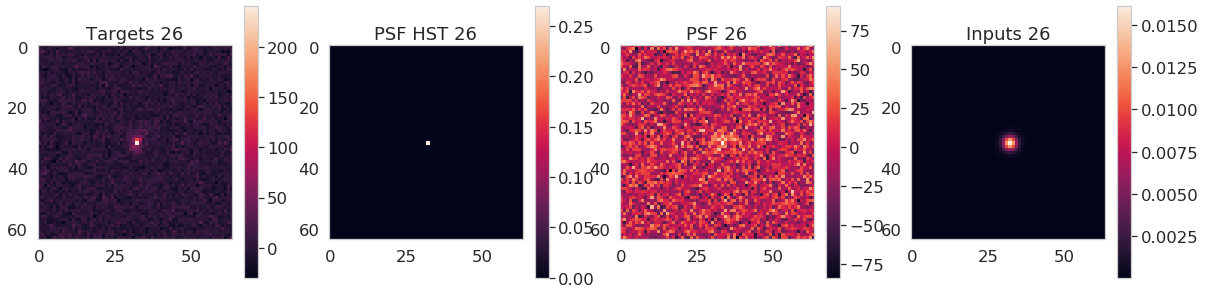

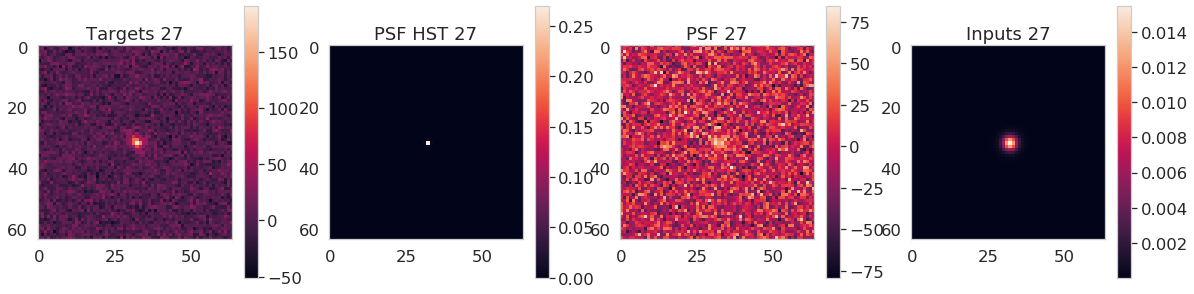

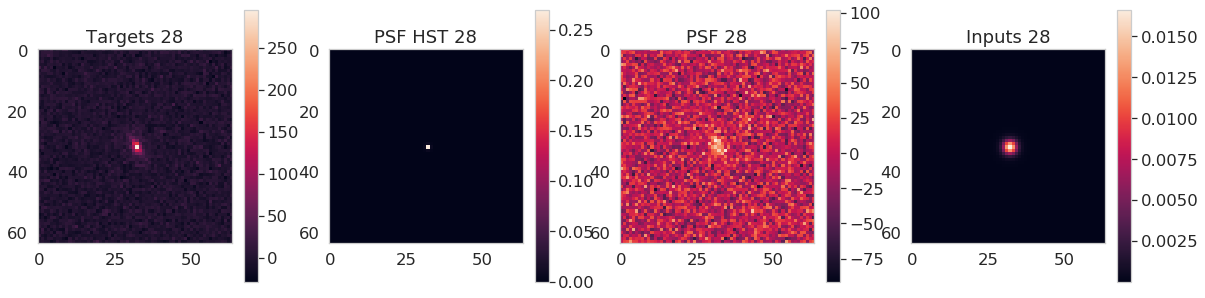

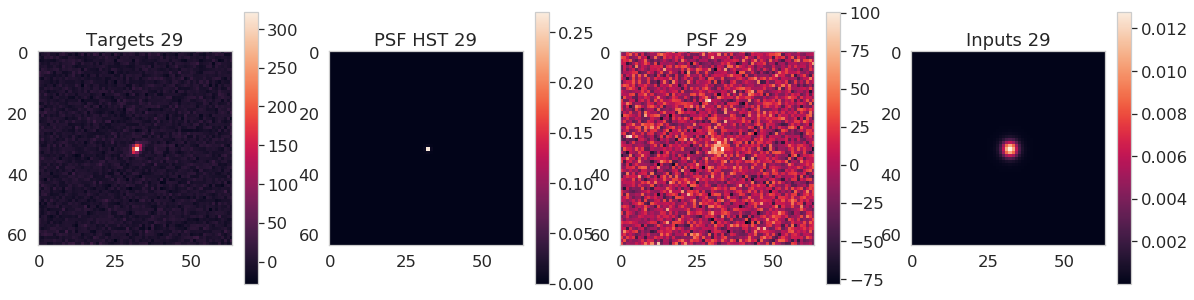

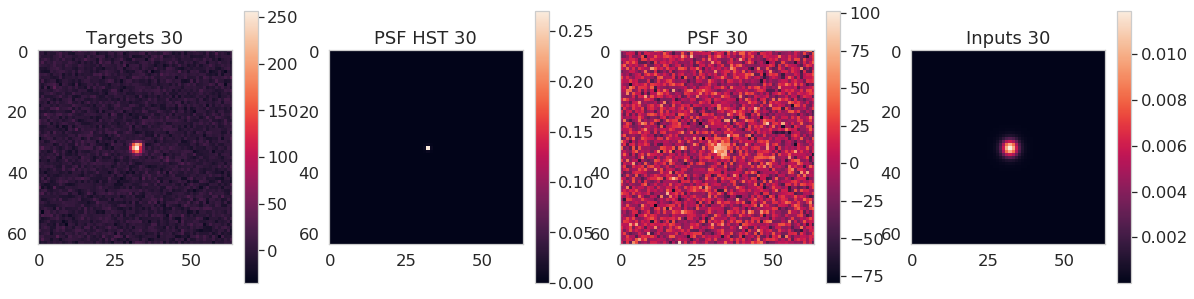

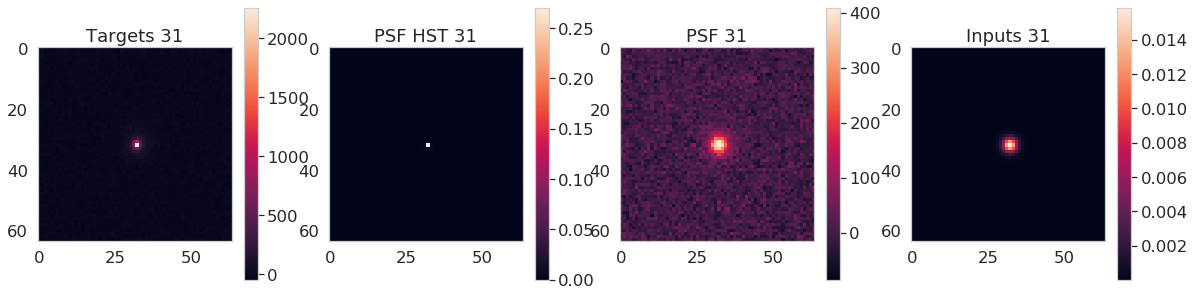

In [4]:
# set seaborn theme and style
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

for i in range(n_batch):
    plt.figure(33,figsize=(20,5))
    plt.subplot(141)
    plt.imshow(batch['targets'][i,...,0])
    plt.title('Targets {}'.format(i))
    plt.colorbar()
    plt.subplot(142)
    plt.imshow(batch['psf_hst'][i,...,0])
    plt.title('PSF HST {}'.format(i))
    plt.colorbar()
    plt.subplot(143)
    plt.imshow(batch['inputs'][i,...,0])
    plt.title('PSF {}'.format(i))
    plt.colorbar()
    plt.subplot(144)
    plt.imshow(batch['psf_cfht'][i,...,0])
    plt.title('Inputs {}'.format(i))
    plt.colorbar()
    plt.show()

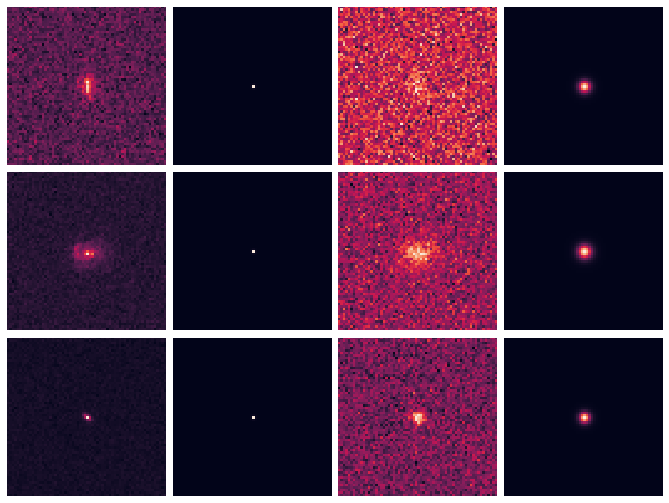

In [5]:
from mpl_toolkits.axes_grid1 import ImageGrid

i1,i2,i3 = 5, 6, 22

fig = plt.figure(figsize=(12, 9))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(3, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

target1, psf_hst1, input1, psf_cfht1 = batch['targets'][i1,...,0], batch['psf_hst'][i1,...,0],\
                                      batch['inputs'][i1,...,0] , batch['psf_cfht'][i1,...,0]
target2, psf_hst2, input2, psf_cfht2 = batch['targets'][i2,...,0], batch['psf_hst'][i2,...,0],\
                                      batch['inputs'][i2,...,0] , batch['psf_cfht'][i2,...,0]
target3, psf_hst3, input3, psf_cfht3 = batch['targets'][i3,...,0], batch['psf_hst'][i3,...,0],\
                                      batch['inputs'][i3,...,0] , batch['psf_cfht'][i3,...,0]

for ax, im in zip(grid, [target1, psf_hst1, input1, psf_cfht1,
                         target2, psf_hst2, input2, psf_cfht2,
                         target3, psf_hst3, input3, psf_cfht3]):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)
    ax.axis('off')

plt.savefig('cfht2hst_examples.pdf')